Data analytics lab. 6

Tomasz Brania

# Lab 6 - Model comparison

In [34]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

Exercise 1

In [35]:
F = len("Tomasz")
L = len("Brania")
N = 100 * (F + L)
print(N)

1200


In [36]:
model1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [37]:
R = 1
sim1 = model1.sample(data={'N':N},
                    iter_sampling=R,
                    iter_warmup=0,
                    chains=1,
                    fixed_param=True,
                    seed=13042023,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [38]:
df_sim1 = sim1.draws_pd()
df_sim1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.01,-1.54782,-1.83576,0.290216,0.291323,-0.110994,1.04445,-0.155253,...,2.025,-0.307912,0.829568,-0.651446,0.301825,1.21207,-0.924423,1.06413,0.379568,1.28396


In [39]:
model2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [40]:
R = 1
sim2 = model2.sample(data={'N':N},
                    iter_sampling=R,
                    iter_warmup=0,
                    chains=1,
                    fixed_param=True,
                    seed=13042023,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [41]:
df_sim2 = sim2.draws_pd()
df_sim2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.403374,0.04325,-1.48767,-1.51926,0.511529,-0.110994,1.04445,-0.812336,...,-0.709708,5.76571,-2.68683,2.77549,-3.49807,-0.04782,-0.153282,3.98306,-3.89677,-0.860512


Exercise 2

In [42]:
model3 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [43]:
y_val = df_sim1.loc[:, 'y[1]':f'y[{N}]'].values.reshape(N)
print(y_val)

[-1.54782  -1.83576   0.290216 ...  1.06413   0.379568  1.28396 ]


In [44]:
sim3 = model3.sample(data={'N':N, 'y':y_val})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)









chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:06 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:07 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:08 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:09 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:10 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:12 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:12 Sampling completed                       
chain 2 |██████████| 00:12 Sampling completed                       
chain 3 |██████████| 00:12 Samplin


INFO:cmdstanpy:CmdStan done processing.


In [45]:
df_sim3 = sim3.draws_pd()
df_sim3.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-2036.63,1.000000,0.98017,2.0,3.0,0.0,2037.58,1.31954,0.121049,-1.99600,...,0.951469,-2.648870,1.63865,-0.131863,-1.320830,0.236115,-0.026544,-0.727145,1.199940,-1.064390
1,-2036.50,0.910023,0.98017,2.0,3.0,0.0,2037.25,1.34750,0.081488,-1.94819,...,0.977053,1.740950,0.67053,-0.740536,-0.731454,-0.201216,-0.146995,0.268508,0.169245,0.198687
2,-2036.49,0.847442,0.98017,2.0,3.0,0.0,2038.02,1.29926,0.082864,-1.96835,...,0.103414,0.355836,2.54254,-0.542512,0.862992,-0.883280,-1.789740,-1.416580,-2.191000,0.757548
3,-2036.90,0.967021,0.98017,2.0,3.0,0.0,2037.06,1.29597,0.053360,-1.94144,...,-0.844873,2.289570,-0.82576,2.615300,-2.134620,-1.113290,-1.670300,-0.159906,-1.276230,-0.638630
4,-2036.35,1.000000,0.98017,2.0,3.0,0.0,2036.84,1.34237,0.083919,-1.95218,...,-1.153060,-0.241953,1.80944,2.759800,0.212472,1.789510,2.586650,0.429970,1.499480,-0.834512


In [46]:
model4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [47]:
sim4 = model4.sample(data={'N':N, 'y':y_val})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:03 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:04 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:05 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:05 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:07 Iteration: 1400 / 


INFO:cmdstanpy:CmdStan done processing.


In [48]:
df_sim4 = sim4.draws_pd()
df_sim4.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-1793.04,0.824854,0.690807,2.0,3.0,0.0,1794.82,0.971329,0.065813,9.44455,...,-1.231480,1.187840,0.076807,0.510228,-0.007120,0.141414,0.184860,-0.806332,-1.048710,1.468590
1,-1791.86,0.921262,0.690807,3.0,7.0,0.0,1794.44,0.934349,0.086777,7.21342,...,-0.369344,0.809223,2.389550,-0.370130,0.937701,-0.231761,-0.402385,0.376764,0.730675,-0.452025
2,-1792.59,0.827732,0.690807,2.0,7.0,0.0,1793.65,0.960674,0.065445,6.79788,...,0.555602,0.635247,1.257590,-0.421078,0.858293,0.005413,2.839280,-1.304590,-0.342488,-0.269753
3,-1791.87,0.826066,0.690807,1.0,3.0,0.0,1794.45,0.935883,0.043693,8.32869,...,1.443420,-2.592890,-0.367310,-0.200442,0.303017,1.062820,1.364800,0.579567,-0.454926,1.794340
4,-1792.62,0.952558,0.690807,3.0,7.0,0.0,1792.81,0.910671,0.090712,7.35640,...,0.969881,-0.521894,0.735174,0.988913,0.834875,-0.120105,0.245918,-0.221778,0.549287,-0.261028


In [49]:
dict_to_compare = {'normal_model': sim3, 'student_model': sim4}

In [50]:
comparision_loo = az.compare(dict_to_compare, ic="loo")
comparision_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
student_model,0,-1795.341313,7.002527,0.000000,1.000000e+00,35.868691,0.000000,True,log
normal_model,1,-2058.428007,38.192344,263.086694,1.888623e-11,179.653569,153.630377,True,log


In [51]:
comparision_waic = az.compare(dict_to_compare, ic="waic")
comparision_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
student_model,0,-1795.07721,6.738424,0.00000,1.000000e+00,35.731734,0.000000,True,log
normal_model,1,-2066.13254,45.896876,271.05533,2.678746e-12,185.846573,160.103217,True,log


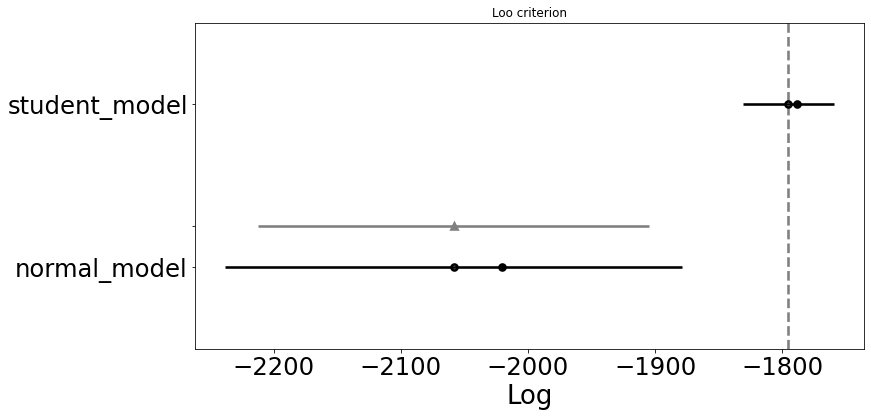

In [52]:
az.plot_compare(comparision_loo, figsize=(12,6))
plt.title("Loo criterion")
plt.show()

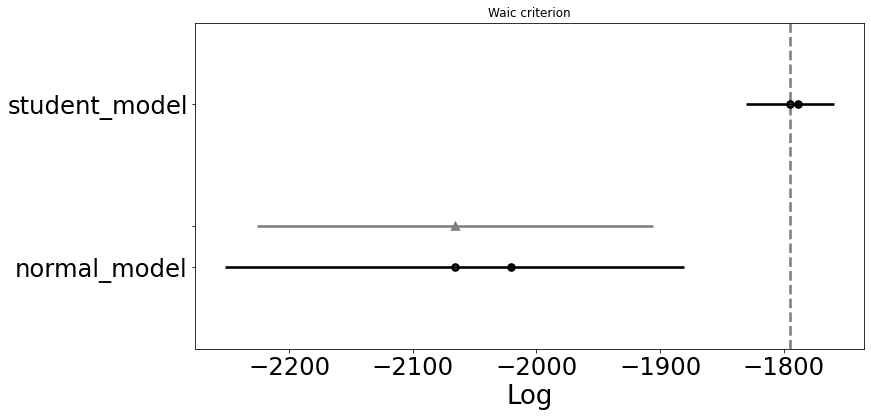

In [53]:
az.plot_compare(comparision_waic, figsize=(12,6))
plt.title("Waic criterion")
plt.show()

Model analysis using loo and waic criteria showed that the student model is a better model.

Exercise 3

In [54]:
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [55]:
y_val1 = df_sim2.loc[:, 'y[1]':].values.reshape(N)
x_val1 = df_sim2.loc[:, 'X[1,1]':f'X[{N},1]'].values.reshape((N, 1))

data_pred1 = {'N':N, 'K':1, 'y':y_val1, 'X':x_val1}
sim5_1 = model5.sample(data=data_pred1)
df_sim5_1 = sim5_1.draws_pd()
df_sim5_1.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)







chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |█████▉    | 00:04 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:06 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:07 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:08 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:09 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:10 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:11 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████ | 00:13 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:14 Iteratio


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,beta[1],mu[1],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-1129.65,1.000000,0.820922,2.0,7.0,0.0,1129.92,1.59534,1.94659,0.785205,...,0.909673,2.000680,-1.120870,1.572110,-0.984958,2.487410,-1.278630,0.008758,1.193410,-0.252476
1,-1129.65,0.927522,0.820922,1.0,1.0,0.0,1130.13,1.59534,1.94659,0.785205,...,-1.874240,1.081780,-0.252525,1.381270,-0.751164,-0.487644,1.849760,-1.492930,-2.695170,2.973420
2,-1130.70,0.880185,0.820922,2.0,3.0,0.0,1131.39,1.49409,2.02217,0.815690,...,1.020010,4.558750,1.146580,2.467230,-3.577680,3.027710,-1.355800,1.420110,-1.141140,2.085400
3,-1130.00,0.994452,0.820922,2.0,3.0,0.0,1131.46,1.60632,2.02354,0.816244,...,1.288900,0.633341,-2.329680,-0.370112,-2.760360,1.065480,0.629297,2.158150,-0.464004,-1.429840
4,-1130.76,0.952138,0.820922,3.0,7.0,0.0,1131.23,1.62035,1.95162,0.787232,...,-0.197989,2.005880,0.731117,-0.801886,-0.139230,1.410140,-1.073460,0.618487,-1.651190,-0.953874


In [56]:
y_val2 = df_sim2.loc[:, 'y[1]':].values.reshape(N)
x_val2 = df_sim2.loc[:, 'X[1,1]':f'X[{N},2]'].values.reshape((N, 2))

data_pred2 = {'N':N, 'K':2, 'y':y_val2, 'X':x_val2}
sim5_2 = model5.sample(data=data_pred2)
df_sim5_2 = sim5_2.draws_pd()
df_sim5_2.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)









chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:03 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:04 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:06 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:08 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:09 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:11 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:13 Iteration:


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,beta[1],beta[2],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-1711.86,0.969900,0.785074,2.0,3.0,0.0,1712.74,2.57714,0.056277,-0.075141,...,0.805502,-5.406550,0.168227,2.750840,2.26683,0.548761,-0.612155,-3.215340,1.389960,-3.831190
1,-1710.12,1.000000,0.785074,2.0,3.0,0.0,1712.19,2.57213,-0.042593,0.082448,...,3.360840,-0.133610,0.036984,-0.573412,4.54490,0.846325,2.569960,-1.901160,-2.410960,0.444521
2,-1710.20,0.991307,0.785074,3.0,7.0,0.0,1710.73,2.57477,-0.098593,0.072676,...,2.999590,-0.138358,-1.427580,-2.172440,3.38260,0.062857,-1.566030,0.022292,3.405570,-2.979900
3,-1711.78,0.860069,0.785074,2.0,3.0,0.0,1712.58,2.42661,-0.087582,-0.059678,...,-0.001083,2.490660,1.542870,4.120290,-4.04518,-2.107720,3.106810,-2.745060,0.365083,4.451520
4,-1712.39,0.976120,0.785074,3.0,7.0,0.0,1713.84,2.45339,-0.191098,-0.052655,...,-1.423100,-1.559170,-2.537770,-3.283850,1.53185,2.658590,-0.026444,-0.453912,0.598659,1.231960


In [57]:
y_val3 = df_sim2.loc[:, 'y[1]':].values.reshape(N)
x_val3 = df_sim2.loc[:, 'X[1,1]':f'X[{N},3]'].values.reshape((N, 3))

data_pred3 = {'N':N, 'K':3, 'y':y_val3, 'X':x_val3}
sim5_3 = model5.sample(data=data_pred3)
df_sim5_3 = sim5_3.draws_pd()
df_sim5_3.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)





chain 1 |██▋       | 00:02 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:02 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:03 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:03 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:05 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:10 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,beta[1],beta[2],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-1709.58,0.978535,0.751246,3.0,7.0,0.0,1710.43,2.56048,-0.088981,-0.054744,...,0.604982,0.675777,0.510195,2.362400,1.59365,0.241417,-0.705706,0.593895,3.767020,0.672659
1,-1709.96,0.963078,0.751246,3.0,7.0,0.0,1710.55,2.53520,-0.019329,-0.009288,...,-2.145520,2.128490,-1.307240,3.397280,-3.82835,-3.020210,1.442700,-0.559111,-0.521638,-1.005040
2,-1710.89,0.932586,0.751246,2.0,7.0,0.0,1711.47,2.53345,0.014854,-0.105822,...,-0.739601,1.212550,-0.572994,-0.281984,3.06381,-1.980610,1.877920,3.863540,2.072260,6.224150
3,-1710.61,0.962514,0.751246,3.0,7.0,0.0,1712.59,2.51947,-0.098153,0.047500,...,-6.280860,-2.886260,-4.948200,-3.686200,-2.02399,1.850510,1.941730,-2.809720,3.348010,-0.873892
4,-1709.86,1.000000,0.751246,2.0,3.0,0.0,1711.07,2.52595,-0.093258,0.043868,...,1.384760,-0.627101,2.500450,-0.477110,4.24618,-1.421130,-2.273070,-0.031652,-7.700850,0.354783


In [58]:
dict_to_compare = {'model5_pred1': sim5_1, 'model5_pred2': sim5_2, 'model5_pred3': sim5_3}

In [59]:
comparision_loo = az.compare(dict_to_compare, ic="loo")
comparision_loo

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model5_pred1,0,-2233.719513,2.153270,0.000000,1.000000e+00,24.932161,0.000000,False,log
model5_pred2,1,-2816.045825,3.136056,582.326312,3.105408e-17,24.327684,26.435438,False,log
model5_pred3,2,-2816.900983,4.215813,583.181470,3.330669e-16,24.331432,26.405443,False,log


In [60]:
comparision_waic = az.compare(dict_to_compare, ic="waic")
comparision_waic

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model5_pred1,0,-2233.719302,2.153060,0.000000,1.000000e+00,24.932130,0.000000,False,log
model5_pred2,1,-2816.045711,3.135943,582.326409,9.931095e-11,24.327667,26.435427,False,log
model5_pred3,2,-2816.900766,4.215595,583.181463,0.000000e+00,24.331416,26.405437,False,log


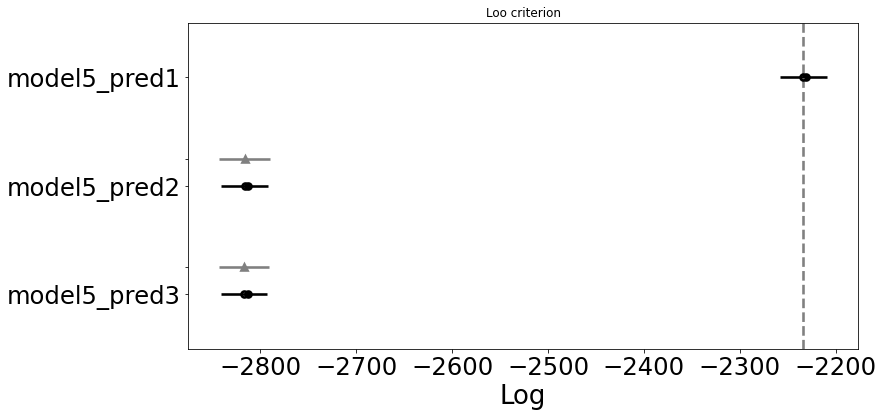

In [61]:
az.plot_compare(comparision_loo, figsize=(12,6))
plt.title("Loo criterion")
plt.show()

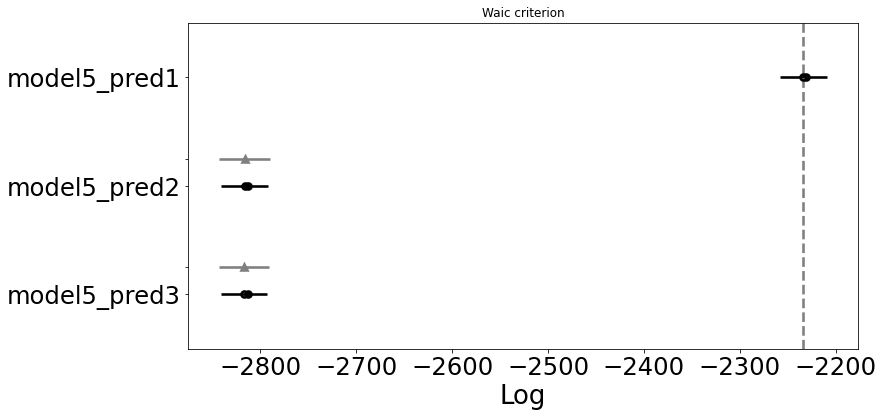

In [62]:
az.plot_compare(comparision_waic, figsize=(12,6))
plt.title("Waic criterion")
plt.show()

Model comparison analysis for different numbers of predictors showed that the best model was the one with one predictor. The other two models obtained similar results.